In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [3]:

df = pd.read_csv('HW_5_cluster_data_2D.dat', delimiter=' ', header=None)


In [4]:
print(df)
data = df[[0, 2]].values

           0   1        2
0    49.6423 NaN  25.7089
1    51.3960 NaN  27.7597
2    56.8664 NaN  26.9182
3    50.8992 NaN  16.2095
4    47.2899 NaN  22.2133
..       ...  ..      ...
195  41.2339 NaN  17.5517
196  32.8211 NaN  26.5675
197  40.7429 NaN  14.8746
198  31.5346 NaN  27.6449
199  43.5959 NaN  26.7174

[200 rows x 3 columns]


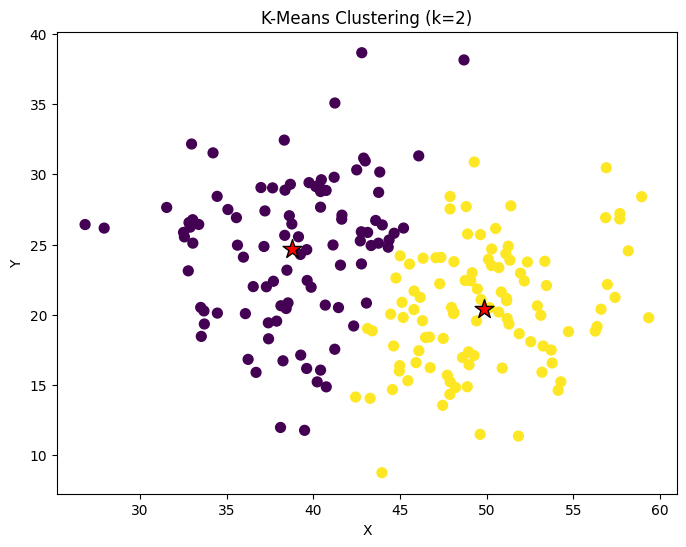

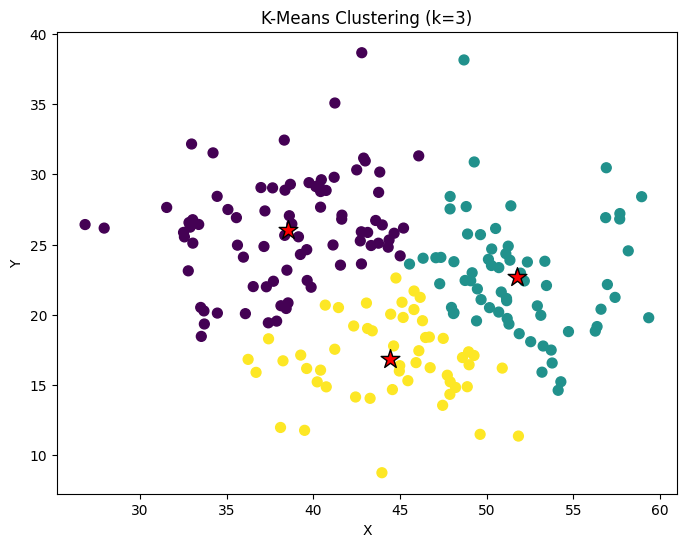

In [5]:
#method 1

def kmeans_2d(data, k, max_iters=100):


    # Initialize centroids randomly
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(np.sum((data[:, np.newaxis, :] - centroids)**2, axis=2))  # Euclidean distance d(p, q) = √[(q1 - p1)² + (q2 - p2)²]
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

data = df[[0, 2]].values  # Extract columns 0 and 2 as a NumPy array


# Perform k-means for k=2 and k=3
for k in [2, 3]:
    centroids, labels = kmeans_2d(data, k)

    # Plot the data points and centroids
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)  # Color by cluster
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', edgecolors='black')  # Centroids
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

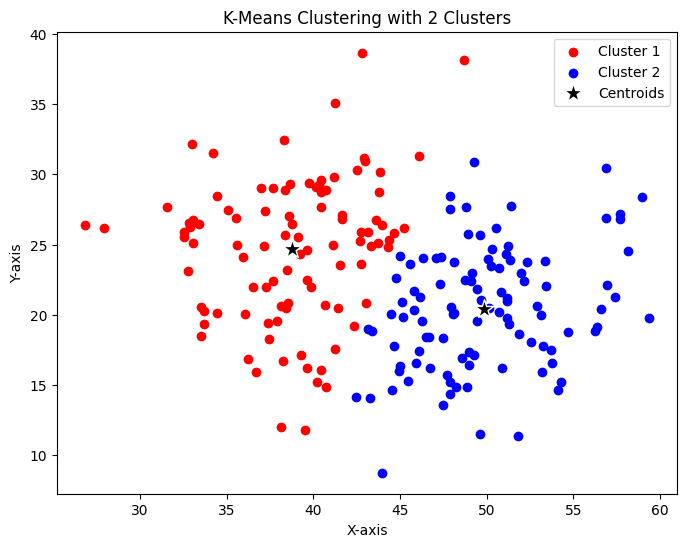

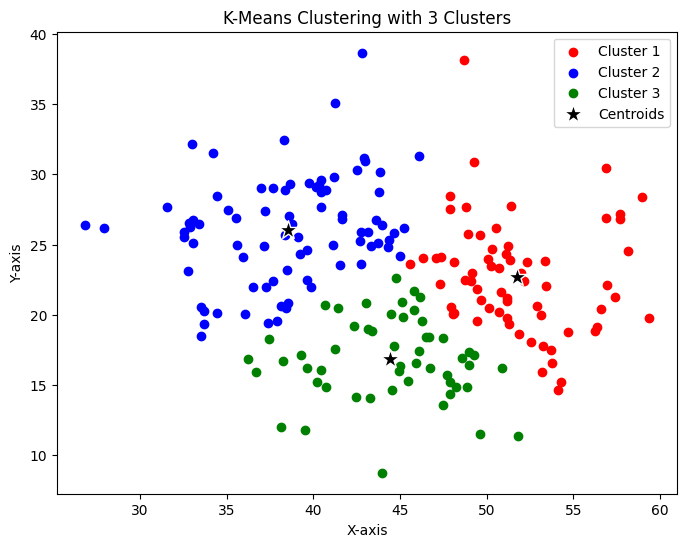

In [6]:
#method 2

def distance(point1, point2):  # To calculate Euclidean distance between two points
    dist = 0
    for i in range(len(point1)):
        dist += (point1[i] - point2[i])**2
    return math.sqrt(dist)

def closest_centroid(point, centroids):  # To find the closest centroid for a point.
    distances = [distance(point, centroid) for centroid in centroids]
    return distances.index(min(distances))

def update_centroids(data, labels, k):  # example: data = [(1, 2), (1.5, 1.8), (5, 8), (8, 8)] labels = [0, 0, 1, 1] k = 2
    # Creating empty lists for each cluster
    clusters = [[] for _ in range(k)]

    # Assigning points to clusters
    for i in range(len(labels)):
        clusters[labels[i]].append(data[i])  # clusters = [ [(1, 2), (1.5, 1.8), (1, 0.6)],  # Cluster 0
                                                          #              [(5, 8), (8, 8), (9, 11)]        # Cluster 1]

    # Updating centroids for each cluster by finding the mean of all points in the cluster
    new_centroids = []
    for cluster in clusters:
        if len(cluster) > 0:  # If the cluster is not empty
            dim = len(cluster[0])  # Number of dimensions/points in each cluster
            means = [sum(point[d] for point in cluster) / len(cluster) for d in range(dim)]
            new_centroids.append(means)
        else:  # If the cluster is empty, pick a random point
            new_centroids.append(random.choice(data))

    return new_centroids

def kmeans_basic(data, k, max_iters=100):
    # 1. Initialize centroids randomly
    # Convert data to a list of lists for random.sample()
    data_list = data.tolist()
    centroids = random.sample(data_list, k)  # Select k random points as initial centroids
    centroids_history = [centroids]  # Keep track of centroids movement in each iteration

    for i in range(max_iters):
        # 2. Assign points to clusters
        labels = [closest_centroid(point, centroids) for point in data]

        # 3. Update centroids
        new_centroids = update_centroids(data, labels, k)

        # Append the new centroids to the history
        centroids_history.append(new_centroids)

        # 4. Check for convergence
        if centroids == new_centroids:
            break

        centroids = new_centroids

    return centroids, labels, centroids_history

def plot_kmeans(data, labels, centroids, k):

    colors = ['red', 'blue', 'green', 'purple', 'orange']
    plt.figure(figsize=(8, 6))

    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if labels[j] == i]
        plt.scatter([point[0] for point in cluster_points],
                    [point[1] for point in cluster_points],
                    color=colors[i], label=f"Cluster {i+1}")

    # Plot only the final centroids with a distinct marker
    plt.scatter([c[0] for c in centroids],
                [c[1] for c in centroids],
                marker='*', s=200, c='black', edgecolors='white', label="Centroids")

    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.legend()
    plt.show()


# Run K-Means for k=2
k = 2
centroids, labels, centroids_history = kmeans_basic(data, k)
plot_kmeans(data, labels, centroids, k)

# Run K-Means for k=3
k = 3
centroids, labels, centroids_history = kmeans_basic(data, k)
plot_kmeans(data, labels, centroids, k)


In [37]:
import numpy as np
import pandas as pd
from collections import Counter

# Load the training and testing data
def load_data(train_data, test_data):
    # Assuming the last column is the target label, adjust if necessary
    X_train = train_data.iloc[:, :-1].values  # All columns except the last one for features
    y_train = train_data.iloc[:, -1].values  # The last column for the target/label

    X_test = test_data.iloc[:, :-1].values   # All columns except the last one for features
    y_test = test_data.iloc[:, -1].values    # The last column for the target/label

    return X_train, y_train, X_test, y_test

# Euclidean Distance Function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# 3 k-NN Classifier
def knn_classifier(X_train, y_train, X_test, k):
    predictions = []

    for test_point in X_test:
        # Calculate the distance to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        # Get the k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Predict the label by majority voting
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return np.array(predictions)

# Accuracy Calculation
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true) * 100


df_train = pd.read_csv('homework_classify_train_2D.dat', delimiter=' ', header=None, usecols=[0, 3, 6])
df_test = pd.read_csv('homework_classify_test_2D.dat', delimiter=' ', header=None, usecols=[0, 3, 6])

# Load the data
X_train, y_train, X_test, y_test = load_data(df_train, df_test)

# Test the k-NN classifier with different values of k

# a. Test it with k=1
y_pred_1 = knn_classifier(X_train, y_train, X_test, k=1)
print(f"Accuracy with k=1: {accuracy(y_test, y_pred_1):.2f}%")

# b. Test it with k=3
y_pred_3 = knn_classifier(X_train, y_train, X_test, k=3)
print(f"Accuracy with k=3: {accuracy(y_test, y_pred_3):.2f}%")

# c. Test it with k=15
y_pred_15 = knn_classifier(X_train, y_train, X_test, k=15)
print(f"Accuracy with k=15: {accuracy(y_test, y_pred_15):.2f}%")





Accuracy with k=1: 80.00%
Accuracy with k=3: 60.00%
Accuracy with k=15: 60.00%


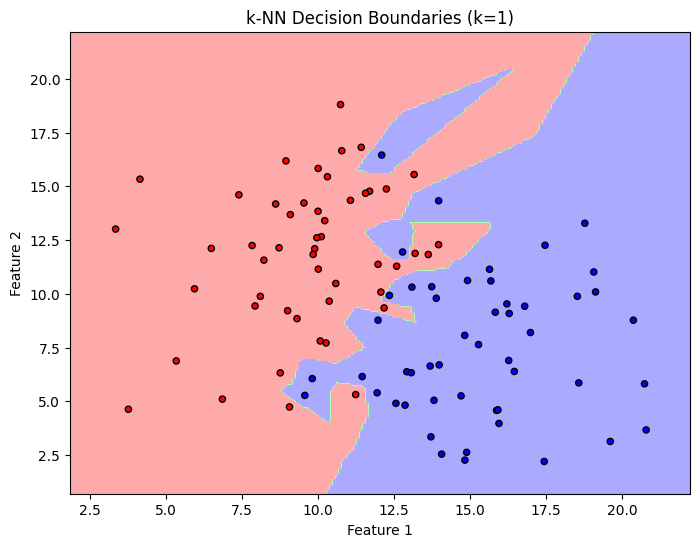

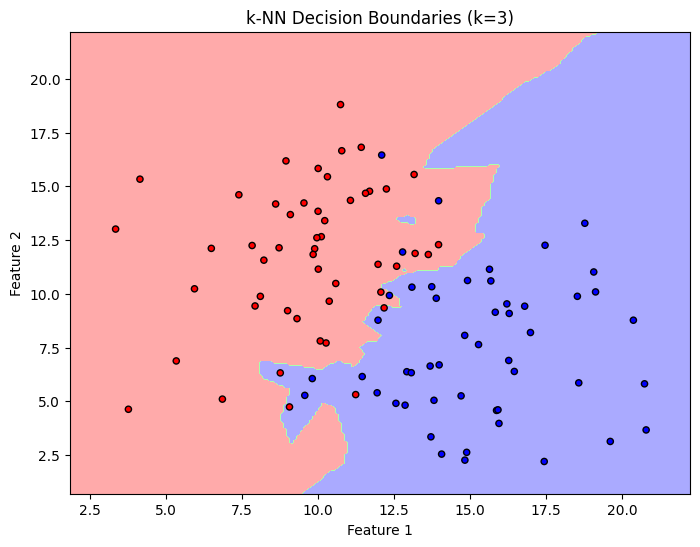

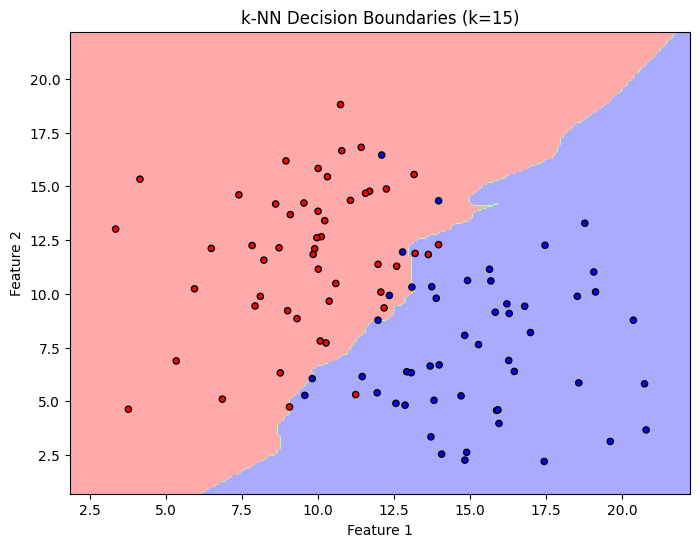

In [36]:
from matplotlib.colors import ListedColormap

# Define k values
k_values = [1, 3, 15]


#the boundaries for the meshgrid
X = np.concatenate((X_train, X_test))

x_min, x_max = X[:, 0].min() - 1.5, X[:, 0].max() + 1.5
y_min, y_max = X[:, 1].min() - 1.5, X[:, 1].max() + 1.5

# Creating the meshgrid to show the boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

grid_points = np.c_[xx.ravel(), yy.ravel()]

# Define colormaps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot for each k value
for k in k_values:
    # Predict class labels for the grid points
    Z = knn_classifier(X_train, y_train, grid_points, k=k)
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries and training data
    plt.figure(figsize=(8, 6))  # Create a new figure for each k
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'k-NN Decision Boundaries (k={k})')
    plt.show()